<a href="https://colab.research.google.com/github/sophiazhou6/kwkdsnyc/blob/main/dataviz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from google.colab import files
import numpy as np #

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
color = sns.color_palette()

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.express as px
import plotly.tools as tls


%matplotlib inline
uploaded = files.upload()

Saving Food_Production.csv to Food_Production (2).csv


In [ ]:
import io
from matplotlib import font_manager as fm
food = pd.read_csv(io.BytesIO(uploaded["Food_Production.csv"]))
food.info()
food.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


In [ ]:
print(food.shape)


(43, 23)


In [ ]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

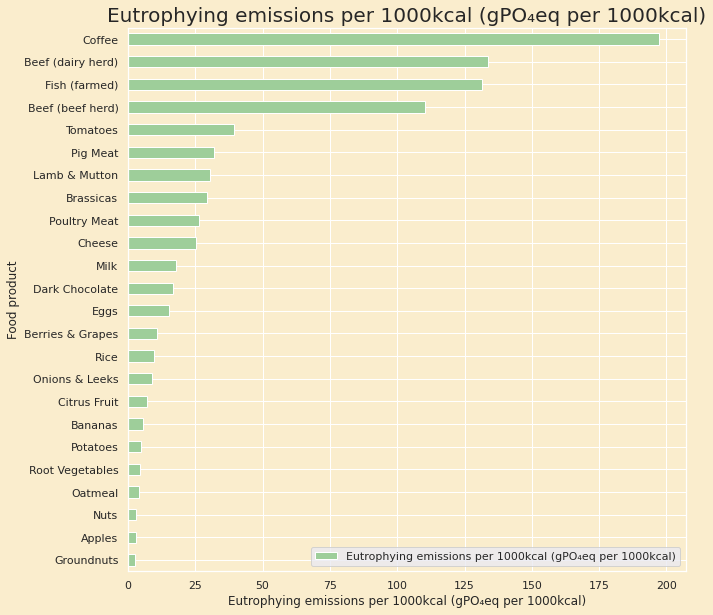

In [ ]:


land= food.dropna().sort_values(by= 'Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)', ascending= True)[['Food product','Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)']]
# dropna drops all the rows with missing values, sort_values sorts the data by land use, [[]] selects the two columns to graph
fig, ax = plt.subplots(figsize=(10,10),facecolor="#faedcd") # sets the size of the figure/creates a subplot with a certain size
ax.set_facecolor("#faedcd")
ax.grid(False)
land.set_index('Food product').plot(kind='barh',ax= ax, color="#9ECE9A") #
plt.xlabel("Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)")
plt.title("Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)", size= 20)


plt.show()


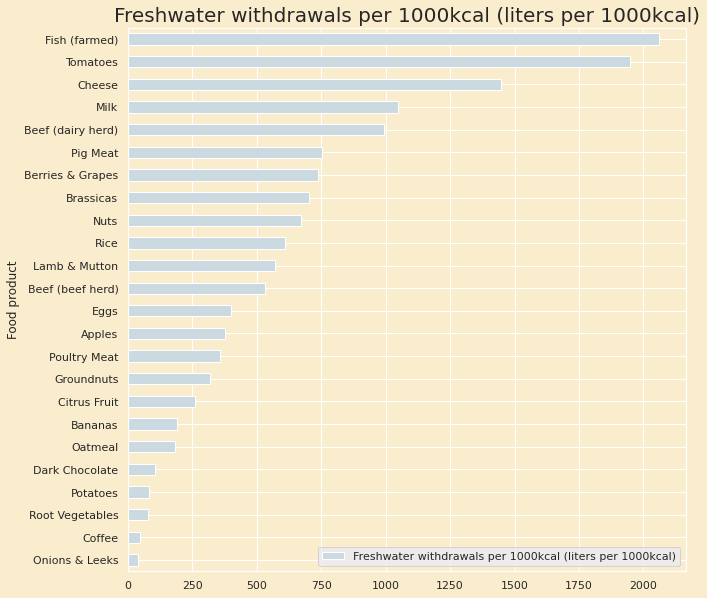

In [ ]:

fig2, ax2 = plt.subplots(figsize=(10,10),facecolor="#faedcd")
ax2.set_facecolor("#faedcd")
ax2.grid(False)
plt.grid(False)
temission = food.dropna().sort_values(by="Freshwater withdrawals per 1000kcal (liters per 1000kcal)",ascending = True)[["Food product","Freshwater withdrawals per 1000kcal (liters per 1000kcal)"]]
temission.plot.barh(x="Food product",y=["Freshwater withdrawals per 1000kcal (liters per 1000kcal)"],ax=ax2,color="#cbdae1")
plt.title("Freshwater withdrawals per 1000kcal (liters per 1000kcal)", size= 20)
plt.show()

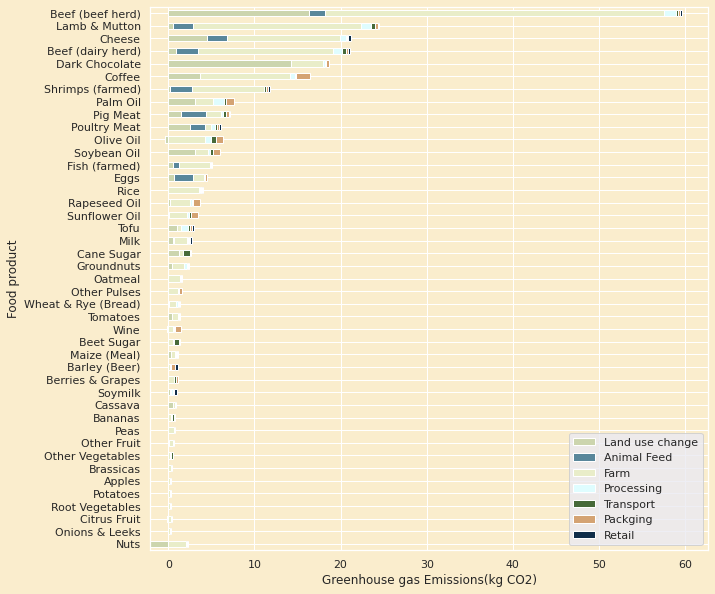

In [ ]:
#catemission = emissions by category
catemission = food.sort_values(by="Total_emissions",ascending = True).iloc[:,:8]
fig, ax = plt.subplots(figsize=(10,10),facecolor="#faedcd")
ax.set_facecolor("#faedcd")
catemission.set_index("Food product").plot(kind="barh",stacked=True,ax=ax,color = ["#Ccd5ae","#59879B","#E9edc9","#DFFDFF","#476A39","#d4a373","#102E4A"])
plt.xlabel("Greenhouse gas Emissions(kg CO2)")
plt.show()

In [ ]:
!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf -P /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf

mpl.font_manager._rebuild()
mpl.rc('font', family='TH Sarabun New')

--2022-08-18 17:26:53--  https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf [following]
--2022-08-18 17:26:53--  https://raw.githubusercontent.com/Phonbopit/sarabun-webfont/master/fonts/thsarabunnew-webfont.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98308 (96K) [application/octet-stream]
Saving to: ‘/usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/thsarabunnew-webfont.ttf.1’

thsarabunnew-webfon 100%[===================>]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



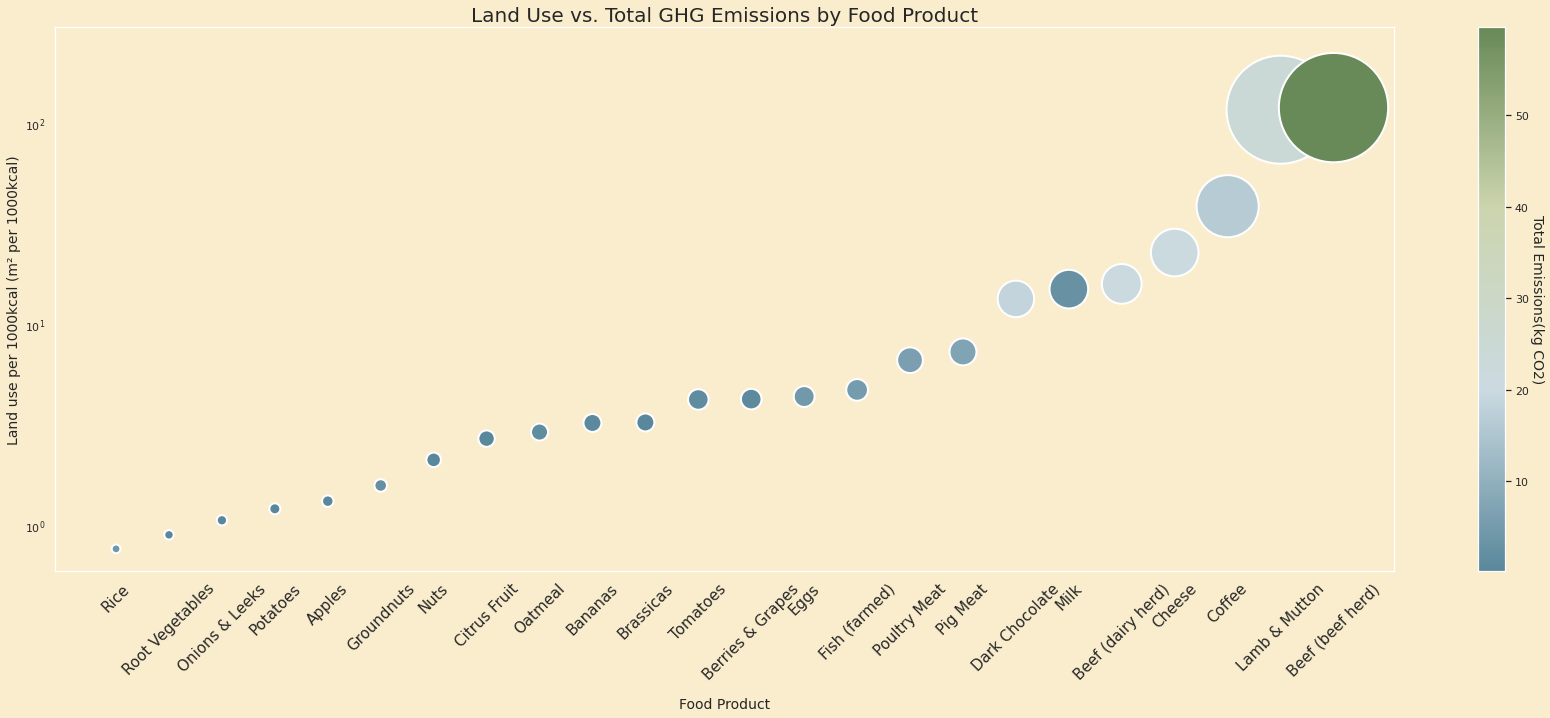

In [ ]:
temission = food.dropna().sort_values(by="Land use per 1000kcal (m² per 1000kcal)",ascending = True)
plt.figure(figsize=(30,10),facecolor="#faedcd")
hfont = {'fontname':'Comic Sans MS'}
ax = plt.axes()
ax.set_facecolor("#faedcd")
ax.grid(False)

plt.yscale("log")
plt.xlabel("Food Product",fontsize = 14,labelpad=15,**hfont)
plt.ylabel("Land use per 1000kcal (m² per 1000kcal)",fontsize = 14,family="TH Sarabun New")


# food["Total_emissions"]=pd.Categorical(food["Total_emissions"])
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["#59879B","#cbdae1","#ccd5ae","#688958"])
fig = plt.scatter(
    x =temission['Food product'],
    y = temission['Land use per 1000kcal (m² per 1000kcal)'],
    s=temission['Land use per 1000kcal (m² per 1000kcal)']*100,
    c=temission["Total_emissions"],
    cmap=cmap,
    alpha=1,
    edgecolors="white",
    linewidth=2);

plt.ylim(0,300)
plt.rcParams['font.sans-serif'] = 'Comic Sans MS'

plt.xticks(rotation = 45,fontsize = 15)
cbar = plt.colorbar()
cbar.set_label('Total Emissions(kg CO2)', rotation=270, labelpad=15, fontsize = 14)
plt.title("Land Use vs. Total GHG Emissions by Food Product", fontsize=20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: UserWarning:

Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.



TypeError: ignored

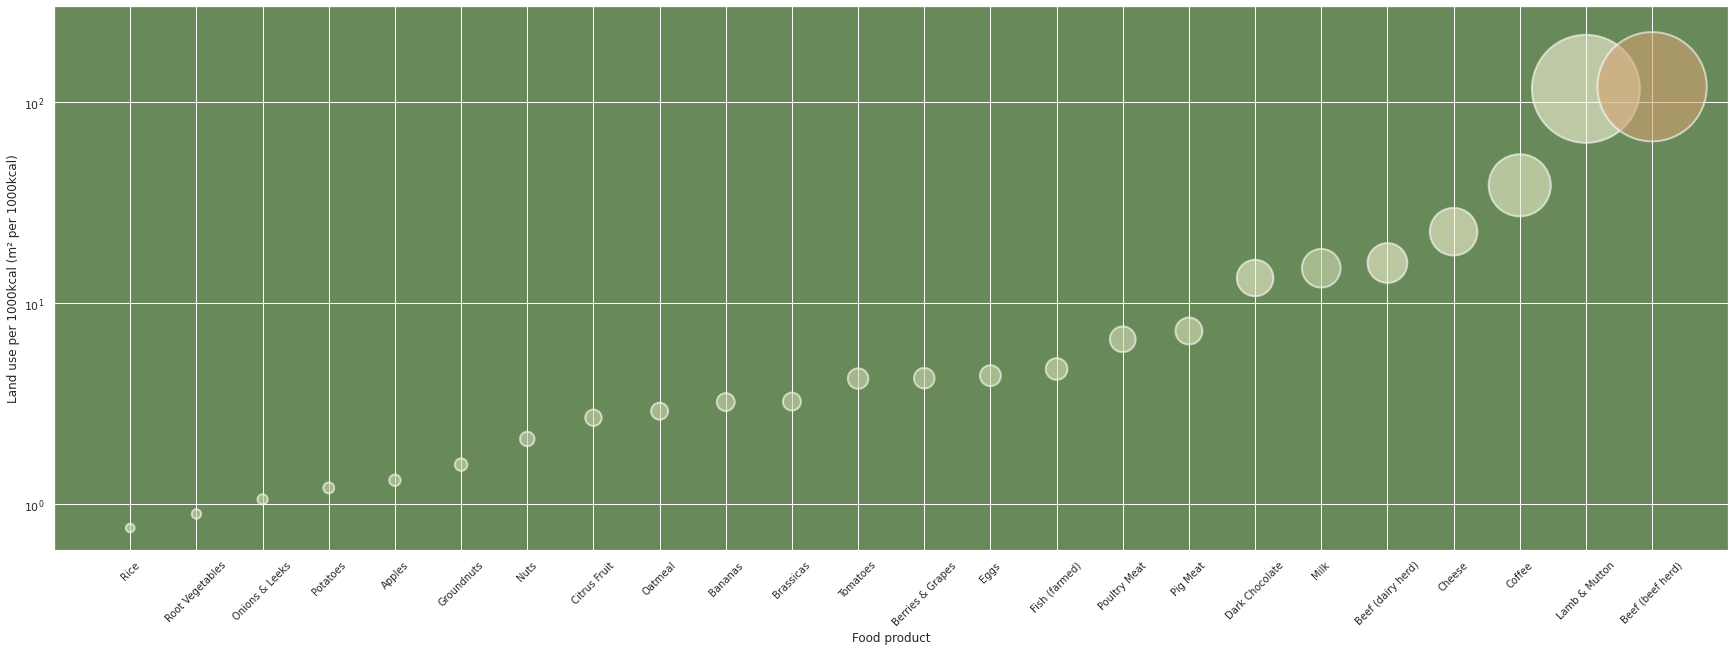

In [ ]:
temission = food.dropna().sort_values(by="Land use per 1000kcal (m² per 1000kcal)",ascending = True)
fig,ax = plt.subplots(1,figsize=(30,10))
# creates the scatter plot
cmap = mpl.colors.LinearSegmentedColormap.from_list("", ["#ccd5ae","#e9edc9","#fefae0","#faedcd","#d4a373"])
ax.scatter(
    x =temission['Food product'],
    y = temission['Land use per 1000kcal (m² per 1000kcal)'],
    s=temission['Land use per 1000kcal (m² per 1000kcal)']*100,
    c=temission["Total_emissions"],
    cmap=cmap,
    alpha=0.6,
    edgecolors="white",
    linewidth=2);
# titles and stuff
plt.yscale("log")
plt.xlabel("Food product")
plt.ylabel("Land use per 1000kcal (m² per 1000kcal)")
plt.ylim(0,300)
ax.set_facecolor("#688958")
plt.xticks(rotation = 45,fontsize = 10)
cbar = fig.colorbar()
cbar.set_label('Total Emissions(kg CO2)', rotation=270, labelpad=15, fontsize = 14)
plt.show()

In [ ]:
temission = food.dropna().sort_values(by="Land use per 1000kcal (m² per 1000kcal)",ascending = True)
plot = go.Figure(data=[go.Scatter(
    x=temission["Food product"],
    y = temission["Land use per 1000kcal (m² per 1000kcal)"],
    mode = "markers",
    marker_size = temission["Land use per 1000kcal (m² per 1000kcal)"],
    marker = dict(
        sizemode = "diameter",
        sizeref=0.5,
        color = temission["Land use per 1000kcal (m² per 1000kcal)"],
        colorscale="algae",
        showscale=True)
)])

plot.update_layout(plot_bgcolor="white")
plot.show(renderer="colab")
plot.write_html("bubble.html")


In [ ]:
print(type(food["Food product"]))


In [ ]:
import plotly.graph_objects as go
fig = go.Figure( go.Scatter(x=[1,2,3], y=[1,3,2] ) )
fig.show()

In [ ]:
pip install squarify

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# libraries
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd

scarc = food.dropna().sort_values(by="Scarcity-weighted water use per kilogram (liters per kilogram)",ascending = True)["Scarcity-weighted water use per kilogram (liters per kilogram)"]

scarc["Scarcity-weighted water use per kilogram (liters per kilogram)"]=scarc["Scarcity-weighted water use per kilogram (liters per kilogram)"].round(1)
scarc["Scarcity-weighted water use per kilogram (liters per kilogram)"]=scarc[scarc["Scarcity-weighted water use per kilogram (liters per kilogram)"] >0]
# print(scarc["Scarcity-weighted water use per kilogram (liters per kilogram)"])
# Create a data frame with fake data

# plot it
figure,ax = plt.subplots(figsize=(50,20))
squarify.plot(sizes=scarc["Scarcity-weighted water use per kilogram (liters per kilogram)"], label=food["Food product"], alpha=.8 ,color="blue")
plt.axis('off')
plt.show()

KeyError: ignored